# Teste de Hipóteses II 

Nesse notebook veremos:

1. Teste de Hipóteses Simples 
2. Hipótese Alternativa Bilateral 
3. Teste T
4. Comparando médias de duas Normais
5. Comparando variâncias de duas Normais 

# Teste de Hipótese Simples

O objetivo é considerar se um vetor de observações vem de uma entre duas observações. Nesse caso o espaço $\Omega$ é formado por dois pontos, e não é um espaço de parâmetros, mas espaço de distribuições, em particular dessas duas distribuições. 

Isto é, vamos assumir que $X = (X_1, ..., X_n)$ vem de $f_0(x)$ ou $f_1(x)$. Assim $\Omega = \{\theta_0, \theta_1\}$ e $\theta = \theta_i$ se os dados tem distribuição $f_i(x), i = 0,1$. 

Vamos denotar:

$
\alpha(\delta) = P(\text{Rejeitar} H_0|\theta = \theta_0) = P(\text{Erro I})
$

$
\beta(\delta) = P(\text{Não rejeitar} H_0|\theta = \theta_1) = P(\text{Erro II})
$

### Teorema 

Seja $\delta^*$ o procedimento de teste que não rejeita $H_0$ se $af_0(x) > bf_1(x)$ e rejeita se $af_0(x) < bf_1(x)$. Então, para todo outro procedimento de teste $\delta$, 
$$
a\alpha(\delta^*) + b\beta(\delta^*) \le a\alpha(\delta) + b\beta(\delta) 
$$

Queremos escolher um teste que minimize essa combinação linear $a\alpha(\delta) + b\beta(\delta)$. Claro que seria ótimo ter esse erro zerado, mas sabemos que existe uma espécie de *trade off* entre esses erros. Esse teorema dá o teste necessário para que isso acontença. 

### Corolário

Considere as hipóteses do teorema anterior, $a > 0$ e $b > 0$. Defina estatística de teste **razão de verossimilhança**:
$$
\Lambda(x) = \begin{cases}
              \frac{f_0(x)}{f_1(x)}, \text{ se } f_0(x) \le f_1(x) \\
              1, \text{ caso contrário }. 
\end{cases}
$$
Defina o procedimento de teste $\delta$: Rejeita $H_0$ se $\Lambda(x) > a/b$. Então o valor de $af_0(x) + bf_1(x)$ é mínimo.  

## Lema Nayman-Pearson

Suponha que $\delta '$ tem a seguinte forma, para algum $k > 0$: $H_0$ não é rejeitada se $f_1(x) < kf_0(x)$ e o é quando $f_1(x) > kf_0(x).$ Se $\delta$ é outro procedimento de teste tal que $\alpha(\delta) \le \alpha(\delta ')$, então $\beta(\delta) \ge \beta(\delta ').$

## Implementação 

Vamos fazer uma simples implementação de uso para esse tipo de problema. 

In [1]:
import numpy as np 
from scipy.stats import bernoulli, binom
from scipy.optimize import brute

Nesse caso, vamos fazer uma simples simulação, onde um parâmetro de uma distribuição de Bernoulli pode ser $p = 0.4$ ou $p = 0.6$. Vamos gerar essa amostra, mas sem de fato conhecer $p$ verdadeiro.

In [2]:
ro = np.random.RandomState(1000000) #random state 
p = ro.choice([0.4, 0.6])

Teremos uma amostra de tamanho $n$.

In [3]:
n = 20
X = ro.binomial(1, p, size = n)

Vamos utilizar o Lema Nayman-Pearson. O objetivo é testar as seguintes hipóteses: 

$$
H_0: p = 0.4
$$
$$
H_1: p = 0.6
$$

Vamos fixar $\alpha_0 = 0.05$ o tamanho do teste. Temos que, se $y = \sum_{i=1}^n x_i \sim Binomial(n,p)$, 

$$
\frac{f_1(x)}{f_0(x)} = \frac{0.6^y0.4^{n-y}}{0.4^y0.6^{n-y}} = \left(\frac{3}{2}\right)^y\left(\frac{2}{3}\right)^{n-y} = \left(\frac{3}{2}\right)^{2y - n}
$$

Assim:

$$
\begin{split}
0.05 &= P(f_1(x) > kf_0(x)|p = 0.4) = P\left(\left(\frac{3}{2}\right)^{2y - n} > k\right) \\
&= P\left(2y - n > \frac{\log(k)}{\log(3/2)}\right)  \\
&= P\left(y > \frac{\log(k)}{2\log(3/2)} + \frac{n}{2}\right), y \sim Binomial(n,0.4)
\end{split}
$$

Isto é, preciso escolher $k$ que satisfaça essa relação. Vamos calcular $k$ numericamente utilizando um método de otimização por bruta força (são poucas as opções). Como não queremos que seja marior do que 0.05, precisamos colocar peso para que não seja. Veja que existem vários valores de $k$ que satisfazem isso. 

In [4]:
alpha0 = 0.05 
Y = binom(n = n, p = 0.4)

func = lambda k, n: np.abs(0.95 - Y.cdf((1/2)*np.log(k)/np.log(3/2) + n/2)) + \
                    10*(0.95 > Y.cdf((1/2)*np.log(k)/np.log(3/2) + n/2))

In [5]:
k = brute(func, ranges = (slice(1,20,1),), args = (n,))[0]
k

6.0

Por esse motivo, vamos tomar $k=6$. Pela Lema de Neyman Pearson, esse teste é o que minimiza o Erro do Tipo II.  

Vamos ver se rejeitamos ou não a hipótese nula baseado nos dados obtidos. 

In [6]:
f0 = lambda x: 0.4**(sum(x))*0.6**(len(x) - sum(x))
f1 = lambda x: 0.6**(sum(x))*0.4**(len(x) - sum(x))

if f1(X) > k*f0(X):
    print(r'Rejeitamos H0.')
else:
    print(r'Não rejeitamos H0.')

Não rejeitamos H0.


Vamos ver quem é $p$, então. 

In [7]:
print('O valor de p é .... ')
print(p)

O valor de p é .... 
0.4


Fizemos bem em não rejeitar a hipótese nula!

# Hipótese Alternativa Bilateral 

Seja $X = (X_1, ..., X_n)$ uma amostra aleatória de uma distribuição normal com média $\mu$ desconhecida e variância $\sigma^2$ conhecida e queremos testar a hipótese 
$$
H_0: \mu = \mu_0
$$
$$
H_1: \mu \neq \mu_0
$$

Como $\bar{X}_n$ é um estimador consistente de $\mu$, faz sentido rejeitar a hipótese nula quando a média amostral se afasta de $\mu_0$. Para isso, vamos escolher $c_1, c_2$ de forma que 

$
P(\bar{X}_n \leq c_1|\mu = \mu_0) + P(\bar{X}_n \geq c_2|\mu = \mu_0) = \alpha_0
$

$
\Rightarrow P\left(Z \leq \sqrt{n}\frac{c_1 - \mu_0}{\sigma}\right) + P\left(Z \geq \sqrt{n}\frac{c_2 - \mu_0}{\sigma}\right) = \alpha_0
$

$
\Rightarrow \Phi\left(\sqrt{n}\frac{c_1 - \mu_0}{\sigma}\right) + 1 -  \Phi\left(\sqrt{n}\frac{c_2 - \mu_0}{\sigma}\right) = \alpha_0 
$

$
\Rightarrow \Phi\left(\sqrt{n}\frac{c_1 - \mu_0}{\sigma}\right) = \alpha_1 \text{ e } \Phi\left(\sqrt{n}\frac{c_2 - \mu_0}{\sigma}\right) = 1 - \alpha_2, \text{ com } \alpha_1 + \alpha_2 = \alpha_0 
$

*Observação:* $\bar{X}_n \sim N(\mu, \sigma^2/n) \Rightarrow Z = \sqrt{n}\frac{\bar{X}_n - \mu}{\sigma} \sim N(0,1)$

*Observação 2:* No cálculo substituimos $\mu$ por $\mu_0$, porque estamos "condicionando" no conhecimento deles serem iguais. 

Isto é, queremos que o tamanho do teste seja $\alpha_0$, lembrando que o tamanho do teste é o supremo das probabilidades de se rejeitar a hipótese nula quando ela é verdadeira. 

# Teste t

Suponha que $(X_1,...,X_n)$ é uma amostra aleatória da distribuição $N(\mu,\sigma^2)$, com parâmetros desconhecidos e queremos testar a hipótese:
$$
H_0: \mu \le \mu_0 \implies \Omega_0 = \{(x,y) \in \mathbb{R}^2 | x \le \mu_0 \text{ e } y > 0\}
$$
$$
H_1: \mu > \mu_0 \implies \Omega_1 = \{(x,y) \in \mathbb{R}^2 | x > \mu_0 \text{ e } y > 0\}
$$

Sabemos que $U = n^{1/2}\frac{\bar{X}_n - \mu_0}{\sigma '}$ é uma boa estatística de teste e rejeitamos $H_0$ se $U \ge c$. Essa estatística é interessante porque quando $\mu = \mu_0, U \sim t(n-1)$. Por isso chamamos de testes t quando baseados na estatística $U$. Podemos também inverter os sinais de desigualdade e rejeitar $H_0$ quando $U \le c$. 


In [8]:
from pandas import DataFrame
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib notebook

In [9]:
mu0 = 10
# Vamos escolher mu e sigma de forma aleatória, mas não significa que é uma variável aleatória. 
n = 20

## Distibuição de U

Vamos gerar uma aproximação para a distribuição de $U$ para um determinado $\mu$. 

In [10]:
U_values = {}
for i in range(6):
    mu = ro.normal(mu0, 1) if i < 5 else 10
    sigma = ro.exponential(mu0) 
    key = 'mu = {}, sigma = {}'.format(np.round(mu,2), np.round(sigma,2))
    U_values[key] = np.zeros(10000)
    for j in range(10000):
        X = ro.normal(mu, sigma, size = n)
        U = np.sqrt(n)*(np.mean(X) - mu0)/np.std(X, ddof = 1)
        U_values[key][j] = U
U_values = DataFrame(U_values)

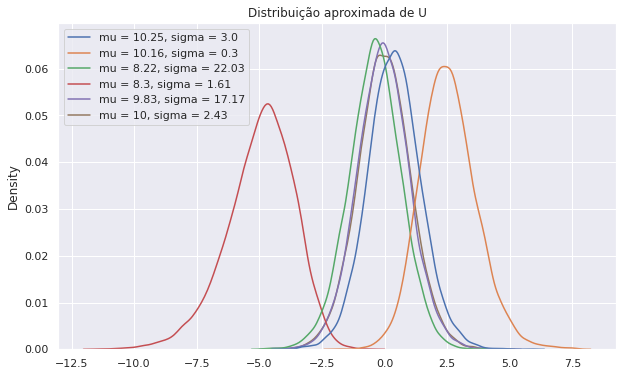

In [11]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(data = U_values, ax = ax)
ax.set_title('Distribuição aproximada de U')
plt.show()

### Teorema 

Seja $c$ o $1 - \alpha_0$ quartil da distribuição $t$ com $n-1$ graus de liberdade. Então, segundo o teste citado acima, a função poder tem as seguintes propriedades: 

1. $\pi(\mu, \sigma^2|\delta) = \alpha_0$, quando $\mu = \mu_0$.
2. $\pi(\mu, \sigma^2|\delta) < \alpha_0$, quando $\mu < \mu_0$.
3. $\pi(\mu, \sigma^2|\delta) > \alpha_0$, quando $\mu > \mu_0$.
4. $\pi(\mu, \sigma^2|\delta) \to 0$, quando $\mu \to -\infty$.
5. $\pi(\mu, \sigma^2|\delta) \to 1$, quando $\mu \to \infty$.

O teste também é não enviesado como consequência.

### P-valores para testes t

Seja $u$ a estatística $U$ quando observada. Seja $T_{n-1}(\cdot)$ a cdf da distribuição t com $n-1$ graus de liberdade. Então o p-valor para $H_0: \mu \leq \mu_0$ é $1 - T_{n-1}(u)$, enquanto o p-valor para $H_0: \mu \ge \mu_0$ é $T_{n-1}(u)$. 

### Distribuição t não central 

O objetivo é encontrar a distribuição de $U$ mesmo quando $\mu \neq \mu_0$. Seja $W$ e $Y$ variáveis aletórias independentes com distribuição $N(\psi, 1)$ e $\chi^2(m)$, respectivamente. Então 
$$
X = \frac{W}{\left(\frac{Y}{m}\right)^{1/2}}
$$
tem distribuição t não central com $m$ graus de liberdade e não centralidade $\psi$. Denotaremos $T_m(x|\psi)$ a cdf dessa distribuição.  

## Teorema  (Função Poder)

Seja $X_1, ..., X_n$ amostra aleatória de $N(\mu,\sigma^2)$. A distribuição de $U$ é t não central com $n-1$ graus de liberdade e parâmetro de não centralidade $\psi = n^{1/2}(\mu - \mu_0)/\sigma$ (*Observe que isso ocorre porque dividimos o numerador e o denominador por $\sigma$. Além disso, note que $X$ não é uma quantidade pivotal, dado que sua distribuição depende de parâmetros desconhecidos*)

Suponha que o procedimento $\delta$ rejeita $H_0: \mu \le \mu_0$ se $U \ge c$. Então a função poder é 
$$\pi(\mu,\sigma^2|\delta) = 1 - T_{n-1}(c,\psi)$$ 

Se $\delta '$ rejeita $H_0: \mu \ge \mu_0$ se $U \le c$. Então a função poder é 
$$\pi(\mu,\sigma^2|\delta) = T_{n-1}(c,\psi)$$

In [12]:
from scipy.stats import nct #noncentral t dsitribution
from matplotlib import animation
from IPython.display import HTML
import warnings

warnings.filterwarnings('ignore')

In [13]:
n = 10
mu0 = 5
sigma = 2
psi = lambda mu: np.sqrt(n)*(mu - mu0)/sigma

In [14]:
X = nct(df = n-1, nc = psi(-20))

Vamos ver o que acontece quando variamos $\mu$. Nesse caso $-20 \leq \mu \geq 20$. 

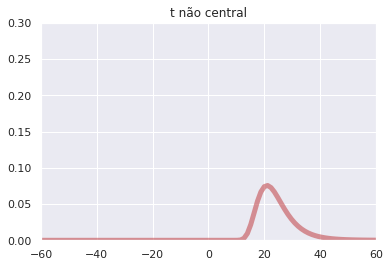

In [15]:
fig, ax = plt.subplots()

x = np.linspace(X.ppf(0.01), 
                X.ppf(0.99), 100)

line, = ax.plot(x, X.pdf(x), 'r-', lw=5, alpha=0.6)

ax.set_xlim((-60,60))
ax.set_ylim((0,0.3))
ax.set_title('t não central')

def animate(i,n):
    
    x = np.linspace(-60, 60, 100)
    line.set_data(x, nct.pdf(x, df = n-1, nc = psi(i-20)))
    
    return line,

HTML(animation.FuncAnimation(fig, animate, frames = 40,
                               interval = 100, fargs=(n,), repeat = False).to_html5_video())

### Alternativa Bilateral 

Tome agora a hipótese
$$
H_0: \mu = \mu_0
$$
$$
H_1: \mu \neq \mu_0
$$

Podemos usar a mesma estatística $U$, mas agora que temos dois lados, vamos fazer o seguinte processo (vou construir de forma intuitiva, no livro tem uma formalização): 

1. O procedimento de teste é do tipo: Rejeitamos $H_0$ se $U \le c_1$ ou $U \ge c_2$. Vamos considerar $c_1 = -c$ e $c_2 = c$, para simplificar.   

2. Seja $\alpha_0$ o tamanho do teste, isto é, a probabilidade de rejeitarmos a hipótese nula quando $\mu = \mu_0$. Quando $\mu = \mu_0$, $U$ tem distribuição t com $n-1$ graus de liberdade. Assim: 

$$
P(|U| \ge c|\mu = \mu_0) = \alpha_0 = P(U \le -c) + P(U \ge c) \overset{simetria}{=} 2P( U \ge c) = 2(1 - P(U \le c))
$$


In [16]:
n = 20
alpha0 = 0.05 
c = t.ppf(df = n-1, q = 1 - alpha0/2)

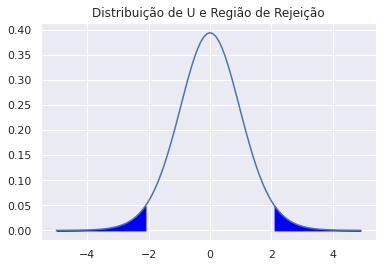

In [17]:
X = t(df = n-1)
x = np.arange(-5,5,0.1)
plt.plot(x, X.pdf(x))
plt.fill_between(x[(x < -c)], X.pdf(x[(x < -c)]), color = 'blue')
plt.fill_between(x[(x > c)], X.pdf(x[(x > c)]), color = 'blue')
plt.title('Distribuição de U e Região de Rejeição')
plt.show()

### Função Poder 

$$\pi(\mu,\sigma^2,|\delta) = T_{n-1}(-x|\psi) + 1 - T_{n-1}(c|\psi)$$

### P-valor

Seja $u$ o valor observado da variável $U$. Vamos lembrar que o p-valor é o menor tamanho $\alpha_0$ tal que se rejeita a hipótese com esse valor observado. Como só rejeitamos se:

$$
|u| \ge c = T_{n-1}^{-1}(1 - \alpha_0/2) \implies \alpha_0 \ge 2 - 2T_{n-1}(|u|)
$$

Logo o p-valor é $2 - 2T_{n-1}(|u|)$.

# Comparando médias de duas normais

Assumimos que $X = (X_1,...,X_m)$ é uma amostra da distribuição normal com média $\mu_1$ e variância $\sigma^2$, enquanto $Y = (Y_1, ..., Y_n)$ é normal com média $\mu_2$ e variância $\sigma^2$. Estamos interessados no teste 
$$
H_0: \mu_1 \le \mu_2
$$
$$
H_1: \mu_1 > \mu_2
$$
A função poder é dada por $\pi(\mu_1, \mu_2, \sigma^2|\delta)$. A discussão quando as normais tem diferentes normais será postergada. 

Defina 
$$
S_x = \sum_{i=1}^m (X_i - \bar{X}_m)^2
$$
$$
S_y = \sum_{i=1}^n (Y_i - \bar{Y}_n)^2
$$
$$
U = \frac{(m + n - 2)^{1/2}(\bar{X}_m - \bar{Y}_n)}{\left(\frac{1}{n} + \frac{1}{m}\right)^{1/2}(S_x^2 + S_y^2)^{1/2}}
$$

A distribuição: $U \sim t$ com $m + n - 2$ graus de liberdade, com parâmetro de não centralidade
$$
\psi= \frac{\mu_1 - \mu_2}{\sigma\left(\frac{1}{m} + \frac{1}{n}\right)^{1/2}}
$$

Note que se $\mu_1 = \mu_2$, $U$ é uma distribuição t padrão.

## Função Poder

Considere o procedimento de teste $\delta$ que rejeite $H_0$ se $U \ge T_{m+n-2}^{-1}(1 - \alpha_0)$. Assim:

1. $\pi(\mu_1, \mu_2, \sigma^2|\delta) = \alpha_0$, quando $\mu_1 = \mu_2$.
2. $\pi(\mu_1, \mu_2, \sigma^2|\delta) < \alpha_0$, quando $\mu_1 < \mu_2$.
3. $\pi(\mu_1, \mu_2, \sigma^2|\delta) > \alpha_0$, quando $\mu_1 > \mu_2$.
4. $\pi(\mu_1, \mu_2, \sigma^2|\delta) \to 0$, quando $\mu_1 - \mu_2 \to -\infty$.
5. $\pi(\mu_1, \mu_2, \sigma^2|\delta) \to 1$, quando $\mu_1 - \mu_2 \to \infty$.

Além do mais o teste é não enviesado. 

## P-valor

Depois de termos observado as amostras, seja $u$ a estatística observada de $U$. O p-valor da hipótese é $1 - T_{m+n-2}(u)$.

> Equivalentemente com o teste t do item 3, podemos expressar tudo com a hipótese bilateral e só altera o graude liberade quando comparado com o teste t anterior.  

## Variâncias diferentes

### Razão entre as variâncias é conhecida

Suponha que se as variâncias de $X$ e $Y$ são $\sigma_1^2$ e $\sigma_2^2$ e que $\sigma^2_2 = k\sigma^2_1, k > 0$. Então podemos usar a estatística 

$$
U = \frac{(m + n - 2)^{1/2}(\bar{X}_m - \bar{Y}_n)}{\left(\frac{1}{n} + \frac{k}{m}\right)^{1/2}(S_x^2 + \frac{S_y^2}{k})^{1/2}}
$$

### Problema de Behrens-Fisher

Quando os 4 parâmetros das normais são desconhecidos, tão pouco a razão de variâncias, nem a estatística de razão de verossimilhança tem distribuição conhecida. Algumas tentativas já foram feitas, como [Welch](https://en.wikipedia.org/wiki/Welch%27s_t-test) e [outros](https://en.wikipedia.org/wiki/Behrens%E2%80%93Fisher_problem#Other_approaches).

# Comparando variâncias de duas Normais

Assumimos que $X = (X_1,...,X_m)$ é uma amostra da distribuição normal com média $\mu_1$ e variância $\sigma^2$, enquanto $Y = (Y_1, ..., Y_n)$ é normal com média $\mu_2$ e variância $\sigma^2$. Estamos interessados no teste 
$$
H_0: \sigma_1^2 \le \sigma_2^2
$$
$$
H_1: \sigma_1^2 > \sigma_2^2
$$
A função poder é dada por $\pi(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2|\delta)$. COnsidere $S_x^2$ e $S_y^2$ definidos anteriormente. Então temos que $S_x^2/(m-1)$ é estimador para $\sigma_1^2$, enquanto $S_y^2/(n-1)$ é estimador para $\sigma_2^2$.

Defina 
$$
V = \frac{S_x^2/(m-1)}{S_y^2/(n-1)}
$$

Rejeitaremos $X_0$ se $V \ge c$, onde $c$ será escolhido para que esse teste tenha nível de significância $\alpha_0$. Esse teste é chamado de teste F, pois a distribuição de $(\sigma_1^2/\sigma_2^2)V$ é F com parâmetros $m-1$ e $n-1$. Em particular se $\sigma_1^2 = \sigma_2^2$, $V$ tem distribuição F. Onde a [distribuição F é descrita aqui](https://lucasmoschen.github.io/TA_sessions/infestatistica/SamplingDistribution/SamplingDistribution/#distribuicao-f). 

## Função Poder

Considere o procedimento de teste $\delta$ que rejeite $H_0$ se $V \ge F_{m-1,n-1}^{-1}(1 - \alpha_0)$. Assim:

1. $\pi(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2|\delta) = 1 - F_{m-1,n-1}(\frac{\sigma_2^2}{\sigma_1^2}c)$
2. $\pi(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2|\delta) = \alpha_0$, quando $\sigma_1^2 = \sigma^2_2$.
3. $\pi(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2|\delta) < \alpha_0$, quando $\sigma_1^2 < \sigma_2^2$.
4. $\pi(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2|\delta) > \alpha_0$, quando $\sigma^2_1 > \sigma_2^2$.
5. $\pi(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2|\delta) \to 0$, quando $\sigma_1^2/\sigma_2^2 \to 0$.
6. $\pi(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2|\delta) \to 1$, quando $\sigma_1^2/\sigma_2^2 \to \infty$.

Além do mais o teste é não enviesado. 

## P-valor

Depois de termos observado as amostras, seja $v$ a estatística observada de $V$. O p-valor da hipótese é $1 - F_{m-1,n-1}(v)$.